# 2강. 1차 연립방정식과 가우스소거법

### 1.1 Introduction : How to solve linear equations with n unknowns?

(1) : Elimination

\begin{equation*}
\begin{cases}
x + 2y = 3\\
4x + 5y = 6
\end{cases}
\end{equation*}


$ (4x + 5y = 6 ) - 4 * (x + 2y = 3 ) => -3y=-6 => y=2, x=-1$


(2) : Determinants

\begin{equation*}
\mathbf{y} =\frac{\begin{bmatrix}
1 & 3 \\
4 & 6 \\
\end{bmatrix}}{\begin{bmatrix}
1 & 2 \\
4 & 5 \\
\end{bmatrix}}=
2
\end{equation*}

\begin{equation*}
\mathbf{x} =\frac{\begin{bmatrix}
3 & 2 \\
6 & 5 \\
\end{bmatrix}}{\begin{bmatrix}
1 & 2 \\
4 & 5 \\
\end{bmatrix}}=
-1
\end{equation*}

보통은 Elimination method가 Determinants 보다 자주 사용된다!




### 1.2 Geometry of Linear Equations

도형의 특성을 이용한 것 
Lines ( 2 unknowns ), plans ( 3 or more unknowns )

\begin{equation*}
\begin{cases}
2x - y = 1\\
x + y = 5\\
\end{cases}
\end{equation*}


(1) row equations : 교점 찾기

2개의 선들을 통해 교점을 찾는 해결방법을 사용한다.



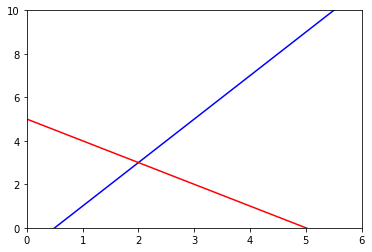

In [73]:
import matplotlib.pyplot as plt
x = [a for a in range(11)]
y = [2*b-1 for b in range(11)]
plt.plot(x,y,'b-')
x2 = [ a for a in range(11)]
y2 = [-b+5 for b in range(11)]
plt.plot(x2,y2,'r-')
plt.axis([0,6,0,10])
plt.show()

교점이 (2,3)인 것을 알 수 있다. 

(2) Column form

\begin{equation*}
\mathbf{x} \begin{bmatrix}
2\\
1
\end{bmatrix}
+
\mathbf{y} \begin{bmatrix}
-1\\
1
\end{bmatrix}=
\begin{bmatrix}
1\\
5
\end{bmatrix}
\end{equation*}


열벡터의 combination을 찾기 위해 $[1,5]^T$를 만든다

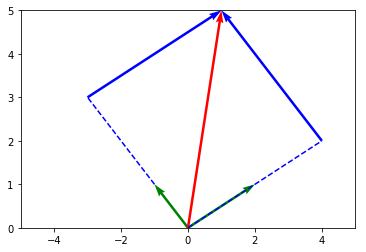

In [74]:
soa = np.array([[0, 0, 2,1], [0, 0, -1, 1],[0,0,1,5],[-3,3,4,2],[4,2,-3,3]]) 
X, Y, U, V = zip(*soa) 
plt.figure() 
ax = plt.gca() 
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1,color=['g','g','r','b','b']) 
ax.set_xlim([-5, 5]) 
ax.set_ylim([0, 5]) 
plt.draw() 

x = [a for a in range(5)]
y = [1/2 *b for b in range(5)]
plt.plot(x,y,'b--')
x2 = [a for a in [-1,-2,-3]]
y2 = [-b for b in [-1,-2,-3]]

plt.plot(x2,y2,'b--')
plt.show() 

두 개의 벡터를 나타냈다. 
평행사변형의 원리를 이용해 x,y값을 구할 수 있다. 
x 방향으로 2만큼 y 방향으로 3만큼 움직여 구할 수 있다. 

*  n = 3일 때,

\begin{equation*}
\mathbf{3 planes} \begin{cases}
2u + v + w = 5\\
4u -6v = -2\\
-2u + 7v +2w = 9
\end{cases}
\end{equation*}

(1) row equations 
교점찾기!

(2) column form
Linear Combination으로 값 찾기

* Singular Cases -> no solution / infinite soluitons

(1) row form
- parallel ( 평행 )   => no solution
- no intersection of 3 planes  => no solution
- line of intersection     => infinite

(2) column form
3개의 열벡터가 평면에 있다.



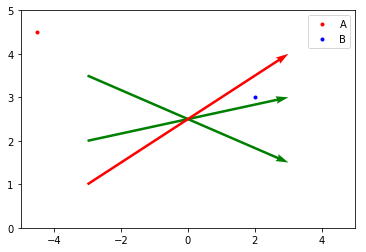

In [75]:
soa = np.array([[-3, 2, 6,1], [-3, 3.5, 6, -2],[-3,1,6,3]]) 
X, Y, U, V = zip(*soa) 
plt.figure() 
ax = plt.gca() 
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1,color=['g','g','r','b','b']) 
ax.set_xlim([-5, 5]) 
ax.set_ylim([0, 5]) 
plt.draw() 

plt.plot(-4.5,4.5,'r.',label='A')
plt.plot(2,3,'b.',label="B")
plt.legend(loc='upper right')

 평면 밖에 있는 점 A의 경우 " No Solution "이고
 
 평면 안에 있는 점 B의 경우는 "Infinite Solution"이다.
 
 "Pivot"은 행렬의 대각선상 성분을 말한다 ( Pivot들은 0이면 안된다 )
 
 \begin{equation*}
\begin{bmatrix}
1st & 0 & \cdots & 0\\\
0&  2nd & \cdots & 0\\\
\vdots & \cdots & \ddots  & \vdots\\\
0 & 0 & \cdots & N
\end{bmatrix}
\end{equation*}

$$1st, 2nd \cdots N ≠ 0$$


### 1.3 Example of Gaussian Elimination

* Forward Elimination Step

\begin{equation*}
\begin{cases}
2u + v + w = 5   (:①) \\\
4u - 6v = -2   (:②)\\\
-2u + 7v +2w = 9  (:③)	
\end{cases}
\end{equation*}

"첫 번째 Pivot"은 $2u$의 2이다. ③번 수식에서 $u$를 제거하기 위해 ①+③을 한다. 

그리고 ②번식의 $u$를 없애기 위해 2*① - ②를 해준다. 결과는 아래와 같다.

\begin{equation*}
\begin{cases}
{\color{Red}2u} + v + w = 5 \\\
-8v-2w = -12\\\
8v+3w = 14
\end{cases}
\end{equation*}

"두 번째 Pivot"는 $-8v$의 -8이다. ③번 수식에서 $v$를 제거하기 위해 ②+③을 한다.

\begin{equation*}
\begin{cases}
2u + v + w = 5 \\\
{\color{Red}-\color{Red}8v} -2w = -12\\\
3w = 2
\end{cases}
\end{equation*}

마지막에 나오는 모형이 변수별로 정렬하면 Triangular System이 나오게 된다. 
$w=2  ->  v=1  -> u=1  :  "back-subtitution"$

 \begin{equation*}
\begin{bmatrix}
2 & 1 & 1 & 5\\
4 & -6 & 0 & -2\\
-2 & 7 & 2  & 9\\
\end{bmatrix}->
\begin{bmatrix}
2 & 1 & 1 & 5\\
0 & -8 & -2 & -12\\
0 & 8 & 3  & 14\\
\end{bmatrix}->
\begin{bmatrix}
2 & 1 & 1 & 5\\
0 & -8 & -2 & -12\\
0 & 0 & 1  & 2\\
\end{bmatrix}
\end{equation*}

Triangular System이 되었다. 

* Breakdown Elimination

Pivot중의 하나가 0으로 나타난다면, Elimination은 중지되어야하고, 방정식간의 순서를 바꾸어야 한다.
(Pivoting)

\begin{equation*}
\begin{cases}
u + v + w = *    (:①)  \\\
2u +2v + 5w = *   (:②) \\\
4u + 6v +8w = *  (:③)	
\end{cases}
\end{equation*}

위의 식일 때 Gauss Elimination을 진행하면 아래와 같은 방정식이 도출된다.
( ② - 2*①   /  ③ - 4 * ① )

\begin{equation*}
\begin{cases}
u + v + w = *   \\\
3w = *   \\\
2v + 4w = *
\end{cases}
\end{equation*}

위의 방정식은 2nd Pivot이 없어서 문제가 발생한다.  이럴경우엔 ②, ③의 순서를 바꾸어 진행한다.
\begin{equation*}
\begin{cases}
u + v + w = *    \\\
2v +4w = * \\\
3w = *   
\end{cases}
\end{equation*}

하지만 위와 같은 경우는 ③의 식이 2nd Pivot을 가져서 해결할 수 있는 Non-Singular 문제이다.

아래의 예는 Singular한 문제를 보여준다. 

\begin{equation*}
\begin{cases}
u + v + w = a    (:①)  \\\
2u +2v + 5w = b   (:②) \\\
4u + 4v +8w = c  (:③)	
\end{cases}
\end{equation*}

위의 식일 때 Gauss Elimination을 진행하면 아래와 같은 방정식이 도출된다.
( ② - 2*①   /  ③ - 4 * ① )

\begin{equation*}
\begin{cases}
u + v + w = a   \\\
3w = b-2a   \\\
4w = c-4a
\end{cases}
\end{equation*}

Zero-Pivot을 위해 바꿔줄 것이 없다.

이 때는 만약에 $\frac{b-2a}{3} = \frac{c-4a}{4}$ 일 경우 Infinite-Solution이다.
반대로 아닐경우는 No-Solution이다. 